In [293]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [294]:
file_path = 'C:\\Users\\LENOVO\\OneDrive\\Documentos\\makineogrenmesi\\Parkison_Dataset.csv'
data = pd.read_csv(file_path)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [295]:
X = data.drop(columns=[ 'class'])
y = data['class']

In [296]:

print(data.head())


print(data.columns)

   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2          

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [315]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'SVM': SVC(random_state=42,C=0.3,kernel='rbf')
}
models

{'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Naive Bayes': GaussianNB(),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'KNN': KNeighborsClassifier(n_neighbors=3),
 'SVM': SVC(C=0.3, random_state=42)}

In [299]:
accuracy_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
accuracy

0.8026315789473685

In [300]:
ensemble_model = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
accuracy_results['Ensemble'] = ensemble_accuracy

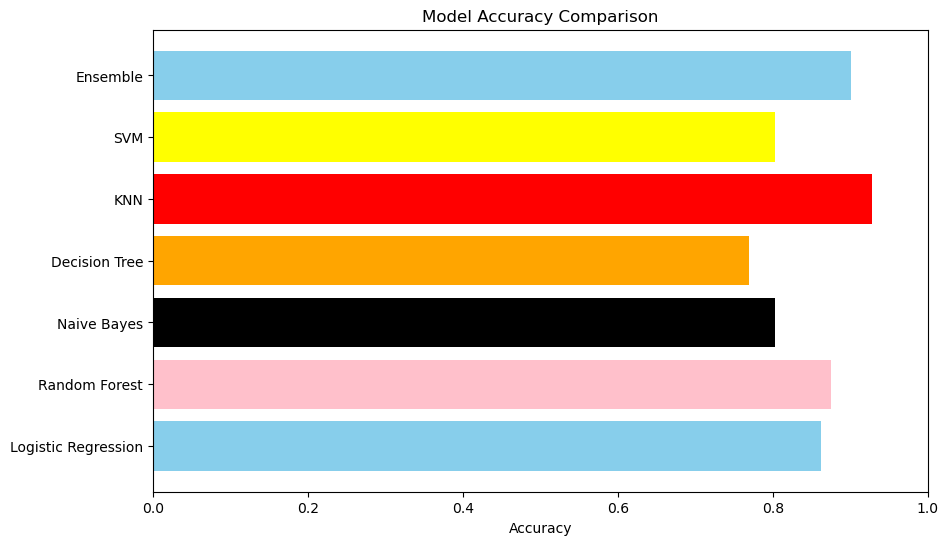

{'Logistic Regression': 0.8618421052631579, 'Random Forest': 0.875, 'Naive Bayes': 0.8026315789473685, 'Decision Tree': 0.7697368421052632, 'KNN': 0.9276315789473685, 'SVM': 0.8026315789473685, 'Ensemble': 0.9013157894736842}


In [301]:
plt.figure(figsize=(10, 6))
plt.barh(list(accuracy_results.keys()), list(accuracy_results.values()), color=['skyblue','pink','black','orange','red','yellow'])
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)
plt.show()


print(accuracy_results)


In [302]:
!pip install xgboost
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.2f}')

XGBoost Accuracy: 0.90
